In [1]:
import subprocess, shlex

In [2]:
path = '/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/MultiHiggs/analysis/MultiHAnalysis/input/Run2_UL/RunIISummer20UL18NanoAODv9/NMSSM_XToYHTo6B'

In [3]:
cmd = f"ls {path}"

In [25]:
output = subprocess.check_output(shlex.split(cmd))
output = output.decode('UTF-8').split('\n')
output = output[:-1]

In [26]:
output[0].split('_')

['NMSSM',
 'XToYHTo6B',
 'MX-1000',
 'MY-250',
 'TuneCP5',
 '13TeV-madgraph-pythia8.txt']

In [51]:
MX = np.array([int(out.split('_')[2].split('-')[1]) for out in output])
MY = np.array([int(out.split('_')[3].split('-')[1]) for out in output])

In [59]:
MX.max()

4000

In [1]:
# MX = np.append(375, np.concatenate((np.arange(400,1000,50), np.arange(1000,2000,100), np.array((2000, 2200, 2400, 2500, 2600, 2800, 3000, 3500, 4000)))))
# MY = np.concatenate((np.arange(250,500,50), np.arange(500,1400,100), np.array((1600, 1800, 2000, 2200, 2400, 2500, 2600, 2800))))

In [52]:
MX_MY = np.array([[mx,my] for mx in MX for my in MY if mx >= my + 125])

In [53]:
MX_MY = np.asarray([[mx,my] for mx,my in zip(MX,MY)])

In [54]:
MX_MY.shape

(365, 2)

In [56]:
MX_min = 375 # GeV
MY_min = 250 # GeV

def f(MX):
   return MX - 125

In [57]:
import matplotlib.pyplot as plt
plt.style.use(CMS)
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

In [61]:
MX.max()+50, MY.max()+100

(2850, 2900)

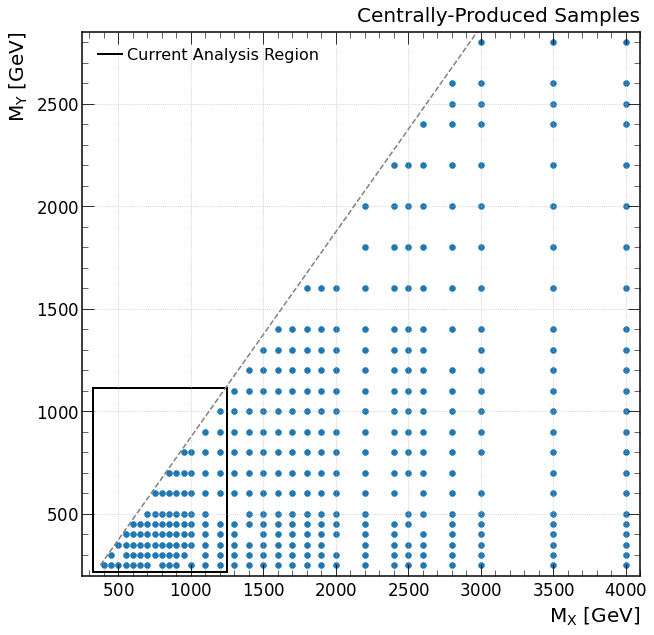

In [64]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(MX_MY[:,0], MX_MY[:,1], lw=0.5)
ax.set_xlabel(r'$M_X$ [GeV]')
ax.set_ylabel(r'$M_Y$ [GeV]')
ax.grid()
ax.set_ylim(200, MY.max()+50)
ax.set_xlim(250, MX.max()+100)

ax.plot([MX_min, MX.max()],[MY_min,f(MX.max())],c='gray',ls='--')

analysis_box = Rectangle((325,215),925,900,fill=False,color='k',lw=2)
ax.add_artist(analysis_box)

analysis_legend = [Line2D([0],[0],color='k',lw=2)]
ax.legend(analysis_legend, ['Current Analysis Region'])

ax.set_title('Centrally-Produced Samples')

fig.savefig("plots/mass_grid.pdf", bbox_inches='tight')
plt.show()